In [1]:
# import sklearn
import numpy as np
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# XGBoost for feature importance on a regression problem
import xgboost as xgb
from matplotlib import pyplot

features=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']

In [3]:
X_out=np.array([[194, 70, 1843, 350, 908, 3330, 342, 157, 1125, 945, 1382, 15053, 6537, 101, 101, 17, 20, 476], 
[18, 17, 507, 48, 115, 552, 103, 10, 68, 380, 168, 470, 382, 5, 26, 2, 2, 34], 
[189, 15, 2955, 103, 1161, 6897, 769, 215, 1170, 1147, 2782, 12886, 2982, 162, 162, 24, 20, 212], 
[182, 31, 698, 70, 243, 1219, 137, 64, 406, 678, 436, 1093, 270, 60, 49, 9, 6, 47], 
[92, 5, 167, 16, 46, 248, 34, 8, 41, 157, 115, 294, 138, 7, 5, 0, 3, 8], 
[18, 7, 48, 16, 23, 247, 32, 4, 82, 11, 66, 147, 78, 6, 6, 0, 0, 9], 
[34, 1, 46, 27, 30, 142, 20, 7, 20, 23, 46, 130, 46, 4, 5, 2, 0, 6], 
[43, 2, 673, 45, 193, 805, 85, 37, 87, 151, 225, 692, 300, 6, 54, 2, 1, 45], 
[25, 2, 70, 23, 25, 125, 15, 0, 31, 25, 32, 200, 66, 2, 9, 1, 0, 3], 
[116, 4, 259, 35, 134, 330, 58, 17, 57, 71, 117, 505, 177, 5, 33, 0, 3, 4], 
[44, 17, 547, 53, 245, 747, 84, 35, 348, 114, 291, 1520, 553, 38, 73, 7, 10, 74], 
[101, 4, 742, 16, 258, 1179, 94, 71, 832, 401, 462, 4029, 829, 28, 173, 5, 12, 43], 
[59, 5, 198, 25, 111, 362, 29, 19, 117, 95, 194, 722, 154, 12, 34, 4, 2, 7], 
[67, 1, 167, 14, 86, 344, 56, 14, 117, 23, 203, 735, 78, 9, 6, 1, 5, 12], 
[36, 1, 121, 9, 94, 275, 21, 10, 84, 54, 168, 400, 51, 10, 16, 1, 0, 3],
[48, 2, 349, 43, 149, 677, 42, 36, 243, 102, 297, 1034, 279, 13, 28, 0, 3, 12], 
[55, 15, 194, 27, 169, 861, 48, 29, 145, 112, 535, 1092, 283, 23, 40, 0, 1, 7], 
[83, 0, 257, 20, 165, 518, 74, 16, 142, 87, 245, 1073, 439, 10, 23, 1, 3, 19], 
[70, 2, 355, 26, 112, 1637, 50, 28, 208, 189, 211, 889, 326, 120, 39, 3, 4, 33],
[69, 2, 554, 34, 253, 1274, 170, 59, 476, 202, 955, 3731, 944, 15, 40, 17, 15, 119], 
[42, 1, 58, 12, 43, 279, 28, 15, 56, 34, 135, 769, 121, 17, 11, 0, 1, 9], 
[17, 1, 14, 2, 18, 117, 9, 1, 11, 3, 58, 93, 13, 6, 3, 1, 0, 2],
[110, 0, 465, 44, 316, 1114, 111, 57, 439, 82, 535, 2164, 676, 16, 47, 3, 10, 34], 
[34, 4, 83, 10, 35, 518, 33, 9, 93, 30, 87, 499, 102, 18, 28, 5, 1, 5], 
[49, 5, 110, 11, 65, 370, 33, 23, 112, 39, 117, 588, 152, 8, 26, 2, 1, 9],
[6, 0, 1, 7, 7, 31, 0, 3, 38, 7, 17, 427, 25, 2, 5, 0, 0, 8],
[16, 4, 183, 19, 102, 412, 26, 14, 198, 82, 272, 769, 138, 26, 47, 2, 6, 8],
[23, 3, 136, 10, 60, 414, 40, 13, 21, 26, 100, 133, 38, 5, 32, 0, 0, 6],
[13, 0, 7, 2, 17, 35, 9, 3, 2, 6, 13, 26, 8, 1, 4, 0, 0, 1],
[1, 0, 6, 2, 3, 18, 1, 1, 5, 4, 5, 25, 1, 0, 0, 0, 0, 1], 
[9, 8, 37, 4, 25, 175, 12, 10, 15, 17, 28, 225, 20, 2, 50, 1, 0, 3]])

In [4]:
X_in=np.array([[131, 56, 1463, 161, 710, 2885, 279, 245, 1222, 812, 1292, 7152, 6595, 156, 147, 20, 58, 553], 
               [22, 16, 492, 24, 105, 417, 87, 20, 31, 193, 161, 196, 311, 8, 21, 1, 2, 25], 
               [239, 19, 3261, 61, 1237, 6802, 922, 289, 1634, 970, 2886, 9350, 3792, 244, 266, 24, 54, 237], 
               [215, 36, 860, 108, 254, 1211, 175, 69, 494, 470, 506, 1165, 327, 84, 72, 24, 26, 90], 
               [105, 1, 160, 30, 54, 232, 40, 12, 51, 109, 137, 185, 150, 6, 12, 2, 6, 11], 
               [28, 4, 63, 20, 31, 211, 31, 8, 93, 15, 72, 150, 57, 12, 6, 2, 2, 7], 
               [36, 5, 64, 41, 41, 140, 26, 8, 31, 45, 42, 122, 57, 11, 10, 0, 0, 8], 
               [69, 3, 745, 60, 192, 809, 102, 46, 141, 93, 318, 614, 353, 18, 53, 1, 14, 57], 
               [12, 1, 58, 11, 10, 72, 9, 1, 21, 6, 27, 47, 37, 2, 2, 0, 0, 5], 
               [153, 8, 318, 42, 119, 368, 87, 22, 89, 81, 154, 344, 212, 17, 19, 0, 2, 14], 
               [50, 6, 591, 37, 260, 668, 117, 63, 420, 70, 342, 1144, 781, 37, 82, 9, 27, 124], 
               [152, 4, 813, 45, 219, 1169, 112, 130, 1328, 631, 612, 3467, 1226, 58, 220, 16, 32, 105],
               [90, 13, 250, 47, 76, 394, 35, 23, 184, 76, 199, 618, 227, 8, 26, 6, 5, 12],
               [78, 0, 159, 27, 94, 341, 60, 23, 178, 51, 183, 585, 127, 17, 18, 3, 8, 19], 
               [53, 2, 159, 17, 90, 275, 26, 12, 107, 46, 222, 352, 74, 13, 33, 7, 6, 12],
               [75, 6, 421, 59, 154, 756, 60, 54, 322, 158, 396, 953, 338, 23, 35, 7, 11, 11], 
               [78, 16, 268, 50, 192, 818, 64, 36, 223, 74, 545, 1021, 378, 25, 52, 3, 8, 12], 
               [125, 2, 310, 31, 138, 351, 93, 20, 193, 71, 282, 815, 560, 16, 15, 0, 6, 38], 
               [89, 4, 481, 43, 99, 1697, 54, 46, 276, 296, 256, 776, 487, 128, 43, 3, 13, 47],
               [101, 7, 703, 46, 237, 1324, 193, 154, 696, 219, 1017, 2711, 1307, 28, 39, 16, 29, 175], 
               [101, 4, 131, 24, 63, 240, 27, 24, 69, 24, 197, 731, 183, 11, 19, 4, 8, 17],
               [11, 1, 21, 3, 11, 79, 9, 6, 11, 8, 21, 61, 9, 3, 6, 2, 0, 1], 
               [178, 11, 610, 70, 237, 963, 128, 59, 631, 137, 622, 1891, 866, 32, 50, 7, 37, 45],
               [52, 6, 163, 9, 58, 496, 47, 21, 137, 46, 134, 479, 143, 15, 38, 1, 1, 2],
               [66, 13, 159, 31, 84, 380, 68, 31, 145, 53, 237, 629, 199, 14, 37, 3, 11, 36],
               [4, 6, 3, 6, 0, 19, 1, 0, 12, 1, 6, 150, 23, 1, 2, 0, 2, 3], 
               [35, 5, 363, 46, 159, 485, 41, 29, 329, 126, 383, 835, 252, 29, 56, 6, 14, 27],
               [36, 5, 133, 20, 62, 405, 35, 27, 49, 69, 142, 142, 75, 12, 32, 2, 3, 2],
               [10, 0, 9, 6, 13, 41, 4, 2, 7, 8, 26, 33, 12, 4, 6, 0, 0, 2], 
               [1, 0, 6, 3, 3, 18, 1, 2, 2, 7, 4, 20, 4, 0, 0, 0, 0, 1], 
               [6, 7, 28, 6, 17, 127, 16, 13, 13, 0, 29, 60, 19, 3, 5, 0, 0, 2]])

# GDP

In [5]:
y = np.array([40269.55,15695.05,43214.85,27894.02,6490.3,5121.61,3121.4,7249.7,7103.12,5351.7,16355.32,18109.42,11412.8,
                11324.48,6650.53,11432.2,12691.02,17716.76,13270.7,28231.97,5120.94,2057.06,19916.98,4711.04,7222.5,741.84,
                10688.28,3231.29,1548.8,2262.95,3691.57])

In [48]:
# # define the model
# model=xgb.XGBRegressor()
# # fit the model
# model.fit(X_out, y)

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_out)
# print(shap_values.shape)

# shap.summary_plot(shap_values, X_out, plot_type="bar", feature_names = features)
# shap.summary_plot(shap_values, X_out, feature_names = features)

(31, 18)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


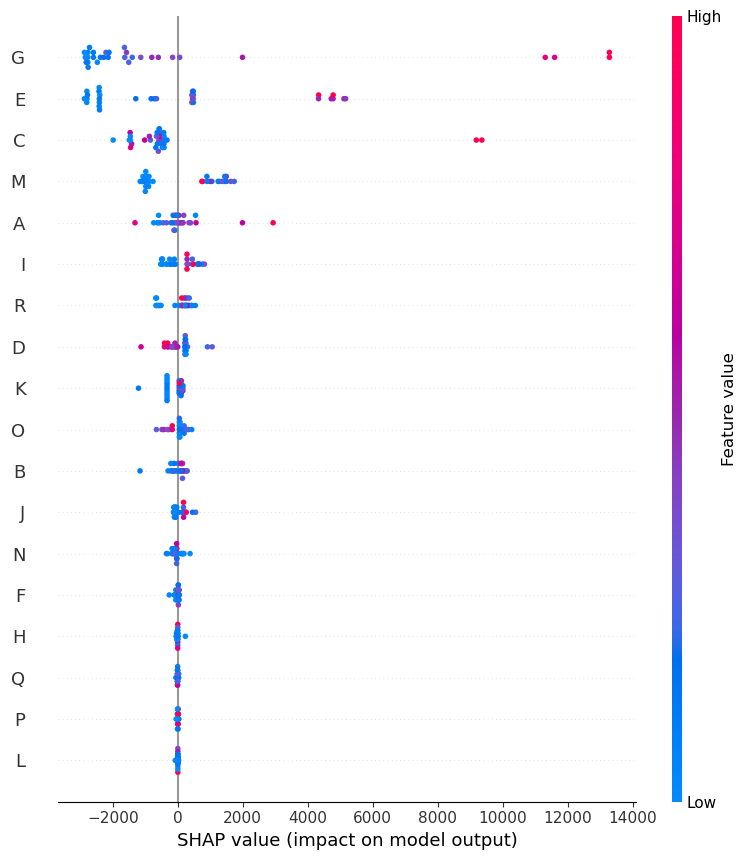

In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# plt.rc('font',family='Times New Roman')
# define the model
model=xgb.XGBRegressor()
# fit the model
model.fit(X_in, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_in)
print(shap_values.shape)

shap.summary_plot(shap_values, X_in, feature_names = features)
# shap.summary_plot(shap_values, X_in, plot_type="bar", feature_names = features)

In [7]:
nor=[]
for i in range(18):
    a=0
    for j in range(len(shap_values)):
        a+=abs(shap_values[j][i])
    nor.append(a/len(shap_values))
add=sum(nor)
nor=[i/add for i in nor]

dic={}
for i in range(18):
    dic[features[i]]=nor[i]
dic

{'A': 0.04188148203264291,
 'B': 0.01532127818212633,
 'C': 0.12981434785103502,
 'D': 0.02815941366644934,
 'E': 0.2200194425163304,
 'F': 0.0038298082536386475,
 'G': 0.3180463278843565,
 'H': 0.0022385679790658695,
 'I': 0.038165152605731216,
 'J': 0.013293157597849922,
 'K': 0.02018408717167685,
 'L': 0.0007215584981815176,
 'M': 0.10606009641860364,
 'N': 0.011257424550235531,
 'O': 0.016303274641146972,
 'P': 0.001044186506974291,
 'Q': 0.001273211893284464,
 'R': 0.032387181750670506}

In [8]:
nor.sort()
nor

[0.0007215584981815176,
 0.001044186506974291,
 0.001273211893284464,
 0.0022385679790658695,
 0.0038298082536386475,
 0.011257424550235531,
 0.013293157597849922,
 0.01532127818212633,
 0.016303274641146972,
 0.02018408717167685,
 0.02815941366644934,
 0.032387181750670506,
 0.038165152605731216,
 0.04188148203264291,
 0.10606009641860364,
 0.12981434785103502,
 0.2200194425163304,
 0.3180463278843565]

In [9]:
features=[list(dic.keys())[list(dic.values()).index(nor[i])] for i in range(18)]
features

['L',
 'P',
 'Q',
 'H',
 'F',
 'N',
 'J',
 'B',
 'O',
 'K',
 'D',
 'R',
 'I',
 'A',
 'M',
 'C',
 'E',
 'G']

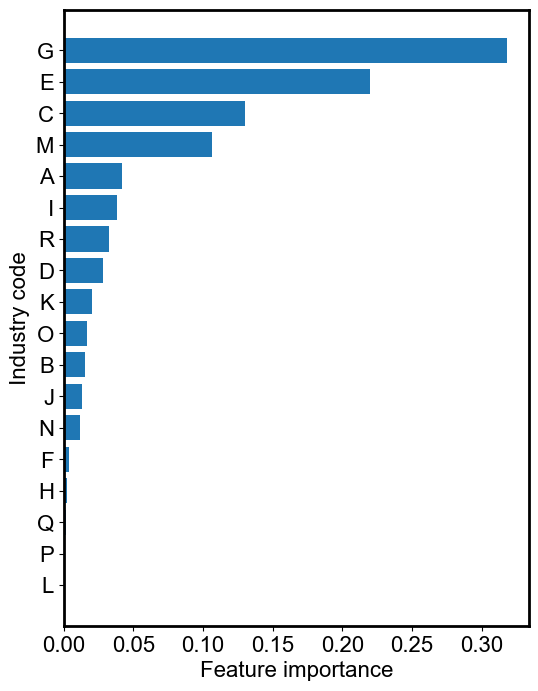

In [10]:
import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
plt.figure(figsize=[6,8])
plt.ylabel('Industry code',fontsize=16)
plt.xlabel('Feature importance',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.barh(features,nor)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

# AQI

In [11]:
y = np.array([63.74794520547945,
 72.56593406593407,
 46.26373626373626,
 56.04931506849315,
 83.61917808219178,
 83.13186813186813,
 65.65934065934066,
 68.01095890410959,
 62.90934065934066,
 66.29395604395604,
 54.892857142857146,
 52.054794520547944,
 63.43681318681319,
 38.24657534246575,
 56.942465753424656,
 78.06301369863014,
 81.61369863013698,
 62.6986301369863,
 68.9478021978022,
 44.7967032967033,
 47.51780821917808,
 27.528767123287672,
 61.084931506849315,
 45.01923076923077,
 46.07397260273972,
 34.184065934065934,
 81.06027397260274,
 74.94794520547946,
 61.83561643835616,
 73.18082191780822,
 80.17307692307692])
features=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']

In [49]:
# model=xgb.XGBRegressor()
# model.fit(X_out, y)

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_out)

# # shap.summary_plot(shap_values, X_out, plot_type="bar", feature_names = features)
# shap.summary_plot(shap_values, X_out, feature_names = features)

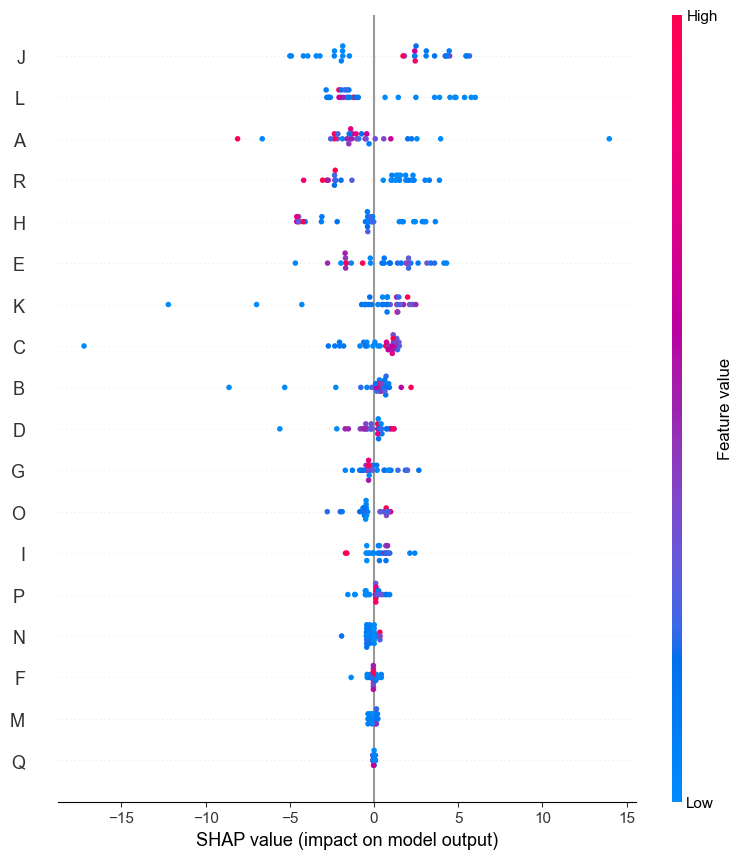

In [12]:
model=xgb.XGBRegressor()
model.fit(X_in, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_in)

# shap.summary_plot(shap_values, X_in, plot_type="bar", feature_names = features)
shap.summary_plot(shap_values, X_in, feature_names = features)

In [13]:
nor=[]
for i in range(18):
    a=0
    for j in range(len(shap_values)):
        a+=abs(shap_values[j][i])
    nor.append(a/len(shap_values))
add=sum(nor)
nor=[i/add for i in nor]

dic={}
for i in range(18):
    dic[features[i]]=nor[i]
nor.sort()
features=[list(dic.keys())[list(dic.values()).index(nor[i])] for i in range(18)]

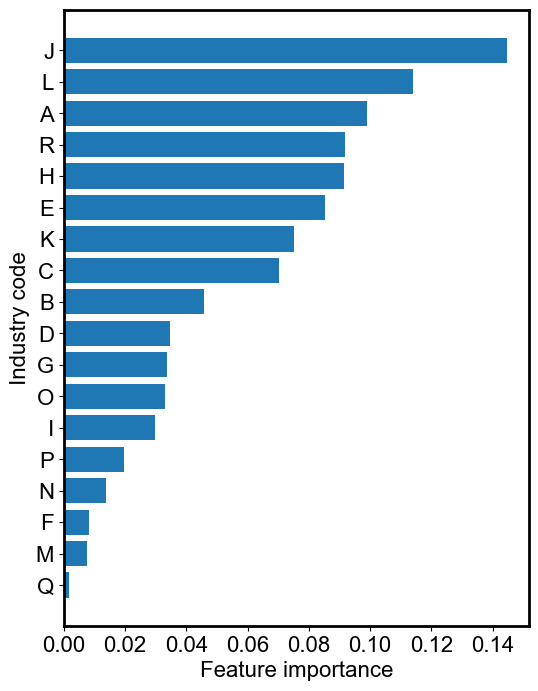

In [14]:
import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
plt.figure(figsize=[6,8])
plt.ylabel('Industry code',fontsize=16)
plt.xlabel('Feature importance',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.barh(features,nor)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

# population (inflow & inward investment)

In [15]:
# 29samples
y_in = np.array([0.0233 ,0.0103 ,0.0240 ,0.0098 ,0.0056 ,0.0082 ,0.0027 ,0.0084 ,0.0058 ,0.0057 ,0.0136 ,0.0168 ,0.0093 
                 ,0.0048 ,0.0067 ,0.0108 ,0.0190 ,0.0123 ,0.0132 ,0.0303 ,0.0082 ,0.0046 ,0.0196 ,0.0095 ,0.0105 ,0.0168 
                 ,0.0059 ,0.0035 ,0.0037])

# 28samples
# y_out = np.array([0.0135 ,0.0091 ,0.0180 ,0.0114 ,0.0062 ,0.0068 ,0.0065 ,0.0045 ,0.0040 ,0.0094 ,0.0131 ,0.0086 ,0.0039 
#                   ,0.0045 ,0.0078 ,0.0137 ,0.0098 ,0.0114 ,0.0230 ,0.0073 ,0.0041 ,0.0192 ,0.0073 ,0.0080 ,0.0154 ,0.0036 
#                   ,0.0033 ,0.0032])
features=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']

In [16]:
I_in = np.delete(X_in, 25, 0)
I_in = np.delete(I_in, 28, 0)

In [17]:
I_in.shape

(29, 18)

In [50]:
# model=xgb.XGBRegressor()
# model.fit(X_out, y_in)

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_out)

# shap.summary_plot(shap_values, X_out, plot_type="bar", feature_names = features)
# shap.summary_plot(shap_values, X_out, feature_names = features)

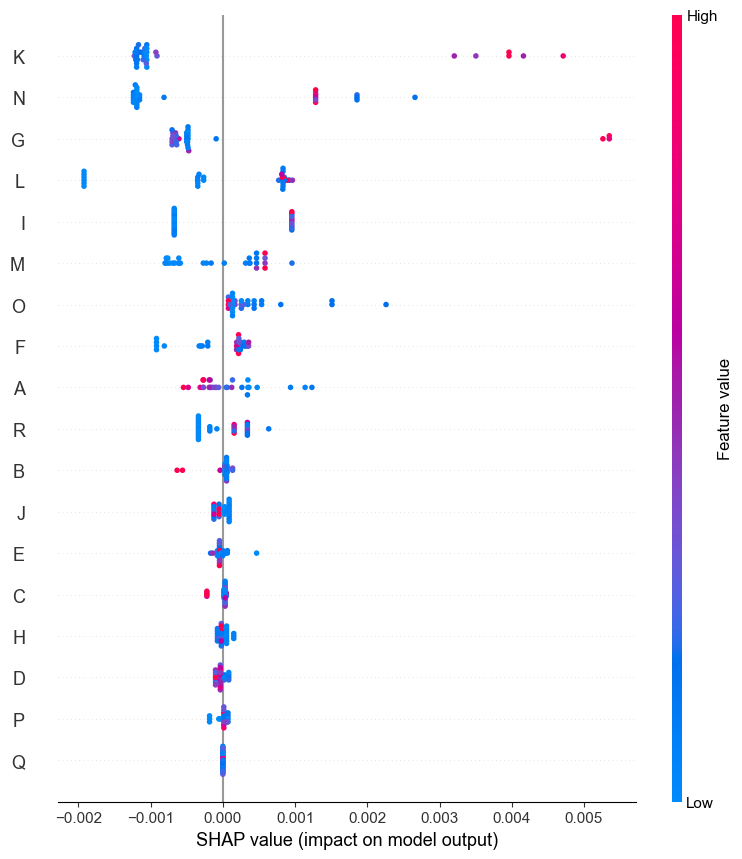

In [18]:
model=xgb.XGBRegressor()
model.fit(I_in, y_in)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(I_in)

# shap.summary_plot(shap_values, I_in, plot_type="bar", feature_names = features)
shap.summary_plot(shap_values, I_in, feature_names = features)

In [19]:
nor=[]
for i in range(18):
    a=0
    for j in range(len(shap_values)):
        a+=abs(shap_values[j][i])
    nor.append(a/len(shap_values))
add=sum(nor)
nor=[i/add for i in nor]

dic={}
for i in range(18):
    dic[features[i]]=nor[i]
nor.sort()
features=[list(dic.keys())[list(dic.values()).index(nor[i])] for i in range(18)]

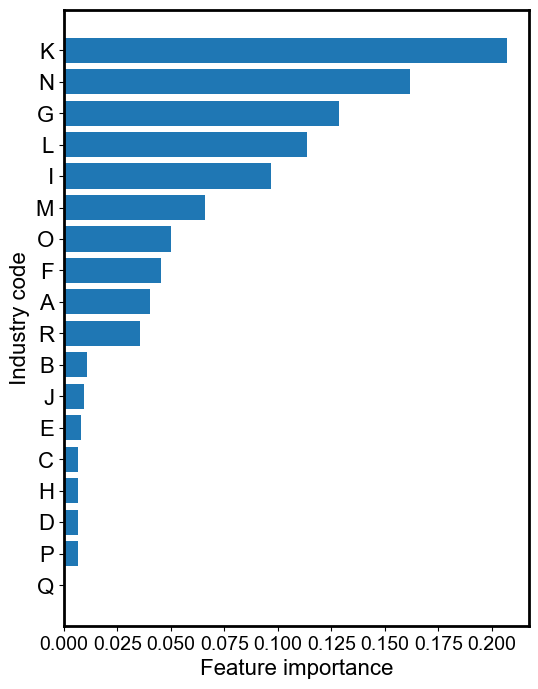

In [20]:
import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
plt.figure(figsize=[6,8])
plt.ylabel('Industry code',fontsize=16)
plt.xlabel('Feature importance',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)

plt.barh(features,nor)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

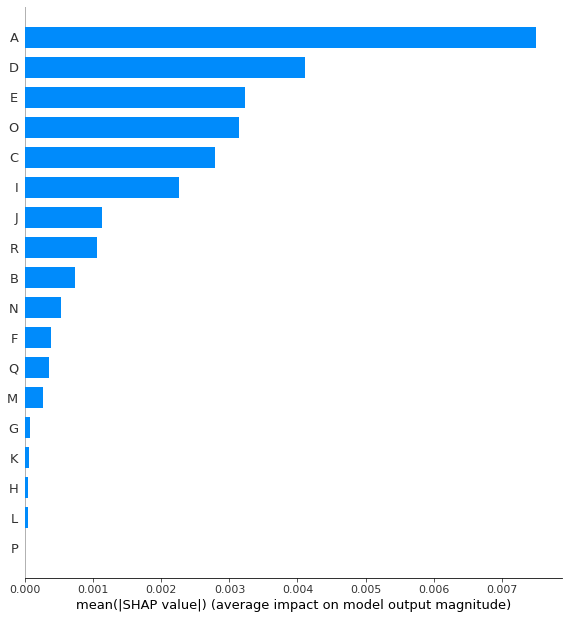

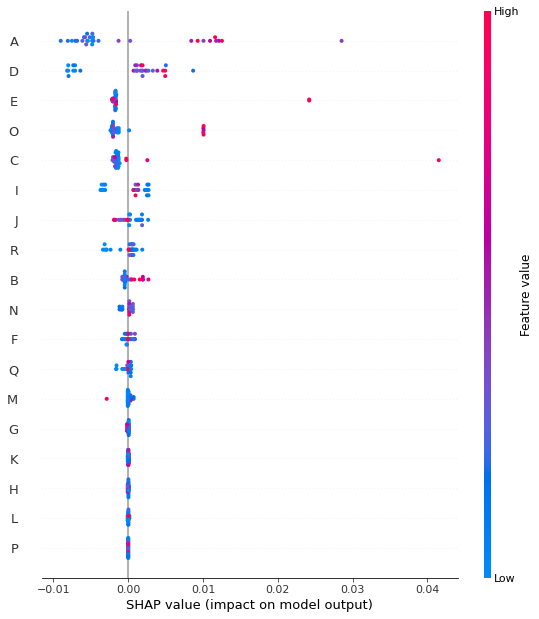

In [24]:
# model.fit(X_out, y_out)

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_out)

# shap.summary_plot(shap_values, X_out, plot_type="bar", feature_names = features)
# shap.summary_plot(shap_values, X_out, feature_names = features)

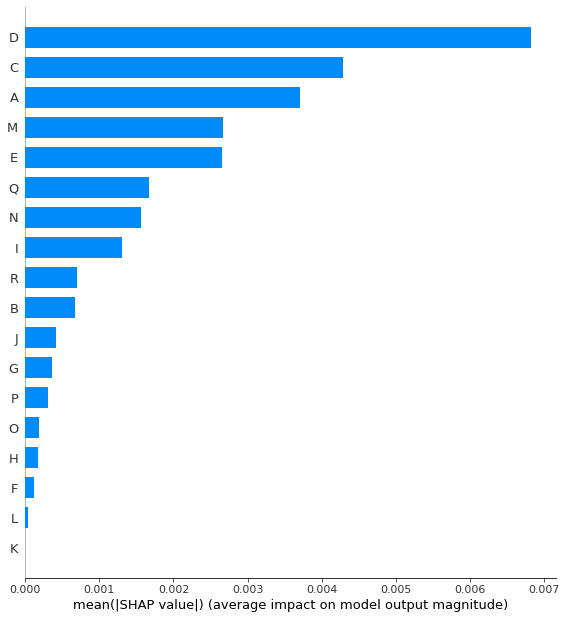

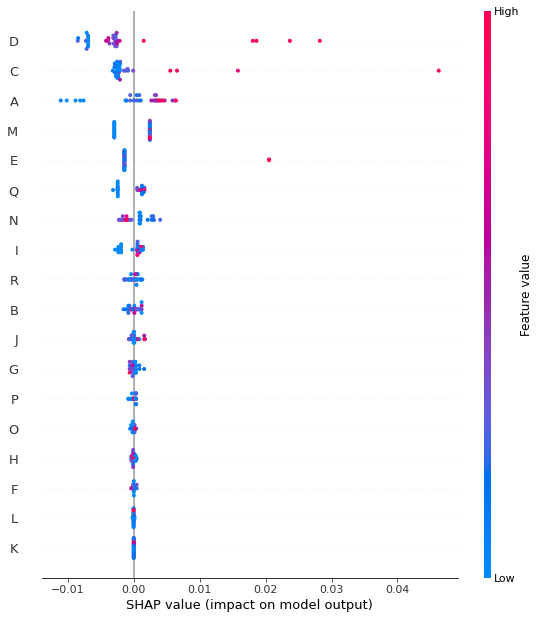

In [25]:
# model.fit(X_in, y_out)

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_in)

# shap.summary_plot(shap_values, X_in, plot_type="bar", feature_names = features)
# shap.summary_plot(shap_values, X_in, feature_names = features)